In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import filters
from skimage.feature.corner import hessian_matrix

In [6]:
def gauusian_curvature(image):
    # Following Kurita and Boulanger (1992), https://www.mva-org.jp/Proceedings/CommemorativeDVD/1992/papers/1992389.pdf
    # x is dimension 0, y is dimension 1
    image_ = image-image.min()
    image_ = image_/np.max(image_)
    hx = filters.sobel_v(image_)/8.
    hy = filters.sobel_h(image_)/8.
    hyy, hxy, hxx = hessian_matrix(image_, sigma=3)
    gaussian_k = (hxx * hyy - hxy**2)/((1 + hx**2 + hy**2)**2)
    return gaussian_k

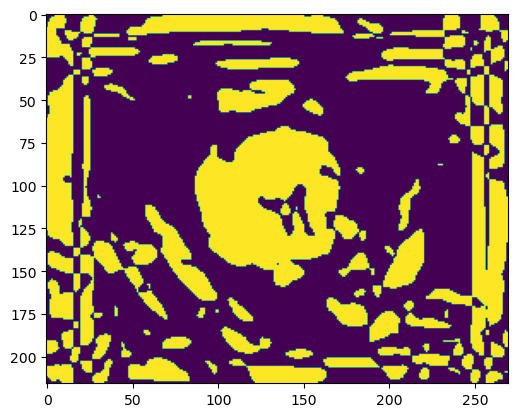

In [10]:
image_file = "/Users/sam/Documents/UNC/Auto_A_Aug18_09-06-42_006/colon_geo_light/joint/frame028019_disp.npy"
im = 1/np.load(image_file)
plt.imshow(gauusian_curvature(im)>0)